# Visión por ordenador: reconocimiento de monedas

Este proyecto consiste en crear un software que estime la cantidad de dinero en monedas que hay encima de una mesa a partir de una imagen

### Importación de módulos necesarios y ajustes de visualización

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rc('figure', figsize=(16,9))

### Apertura y escalado de imagen

A través de los siguientes comandos se procede a la apertura de la imagen en cuestión. Se genera dos variables: 
- **img**: la imagen para el análisis
- **img_orig**: copia "original" de la misma por si fuese necesaria más adelante

El escalado se realiza para disminuir el número de píxeles y realizar el cálculo más rápido

(-0.5, 639.5, 359.5, -0.5)

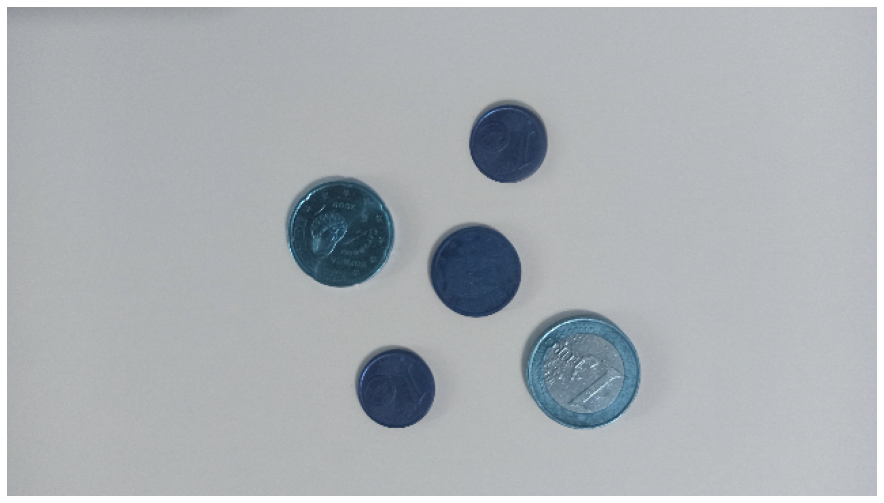

In [2]:
img=cv.imread('monedas.jpg',cv.IMREAD_GRAYSCALE)
img_orig=cv.imread('monedas.jpg',1)
img,img_orig=cv.resize(cv.blur(img,(20,20)),(640,360),4), cv.resize(img_orig,(640,360),4)
plt.imshow(img_orig)
plt.axis('off')

### Detección de círculos a través de la función HoughCircles()

In [3]:
circulos=cv.HoughCircles(img, cv.HOUGH_GRADIENT, 0.7, 80, param1=3, param2=50, minRadius=10, maxRadius=70)

circulos=np.uint16(np.around(circulos))
counter=0
for i in circulos[0,:]:
    cv.circle(img_orig, (i[0],i[1]),i[2], (0,0,255), 2)
    cv.circle(img_orig, (i[0],i[1]),2, (255,0,0), 3)
    counter+=1

(-0.5, 639.5, 359.5, -0.5)

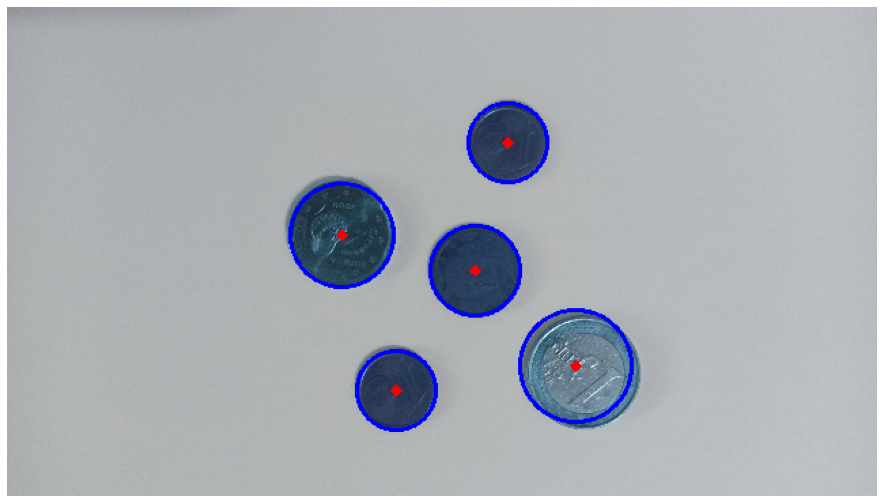

In [4]:
plt.imshow(img_orig)
plt.axis('off')

### Obtención de los radios de cada moneda

En el paso anterior, donde detectamos los circulos, se generó un array de tres columnas [coord X, coord Y, Radio] de cada círculo. 
Por lo tanto, ahora tan sólo debemos tomar la tercera columna de dicho array para conocer los radios

In [5]:
radios=circulos[:,:,2].tolist()[0]
print('Los radios son %s' %radios)

Los radios son [41, 33, 29, 38, 29]


### Obtención del valor de cada moneda en función de su radio

In [6]:
valores=[]
for r in radios:
    if r<=31:
        valores.append(0.01)
    elif r>31 and r<=35:
        valores.append(0.02)
    elif r>35 and r<=39:
        valores.append(0.20)
    elif r>39 and r<=42:
        valores.append(1)

### Visualización del resultado sobre la imagen original

In [7]:
moneda_n=0
for i in circulos[0,:]:
    cv.putText(img_orig, str(valores[moneda_n]) + 'EUR',(i[0], i[1]), cv.FONT_HERSHEY_SIMPLEX, 0.7, (250,250,250), 2)
    moneda_n+=1
cv.putText(img_orig, 'VALOR TOTAL ESTIMADO:' + str(sum(valores)) + 'EUR', (50,50), cv.FONT_HERSHEY_SIMPLEX, 0.9,(255,255,255), 2)
print('') #El objetivo de este print es que no salga ningun output impreso

(-0.5, 639.5, 359.5, -0.5)

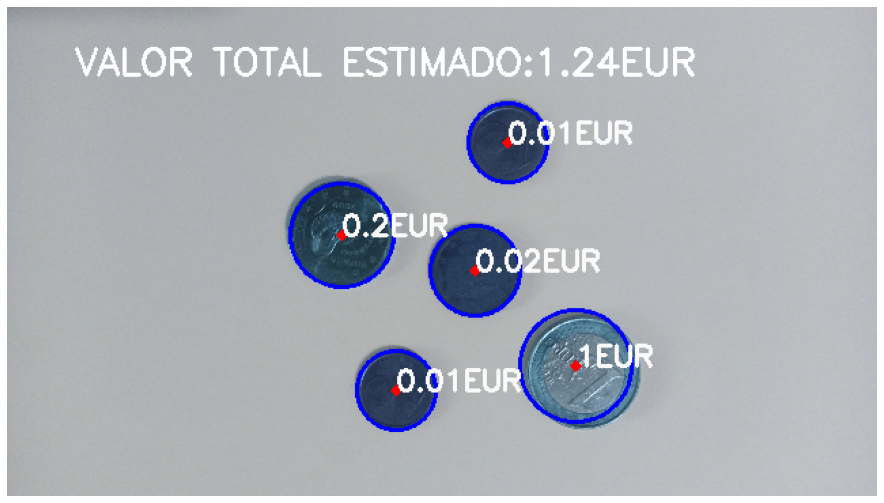

In [8]:
plt.imshow(img_orig)
plt.axis('off')